# Project Overview

Sebuah kartu kredit memungkinkan pengguna untuk meminjam uang dari penerbitnya untuk pembelian atau penarikan uang tunai, yang harus dikembalikan dengan bunga. Segmentasi pelanggan melalui pengelompokan kartu kredit dapat membantu dalam pemasaran yang lebih tepat sasaran dengan membagi pelanggan berdasarkan pola pengeluaran. Dataset ini merangkum perilaku penggunaan sekitar 9000 pemegang kartu kredit aktif selama 6 bulan terakhir dan terdapat 18 atribut dalam dataset. Dari data tersebut akan dilakukan pengelompokkan untuk mengetahui segmentasi pelanggan.

Berikut adalah atribut yang terdapat dalam dataset:

* CUST_ID: Identifikasi pemegang kartu kredit (Kategorikal)
* BALANCE: Jumlah saldo yang tersisa dalam akun untuk melakukan pembelian
* BALANCE_FREQUENCY: Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
* PURCHASES: Jumlah pembelian yang dilakukan dari akun
* ONEOFF_PURCHASES: Jumlah pembelian maksimum yang dilakukan sekaligus
* INSTALLMENTS_PURCHASES: Jumlah pembelian yang dilakukan dengan pembayaran cicilan
* CASH_ADVANCE: Uang tunai yang diberikan oleh pengguna
* PURCHASES_FREQUENCY: Seberapa sering Pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
* ONEOFF_PURCHASES_FREQUENCY: Seberapa sering Pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
* PURCHASES_INSTALLMENTS_FREQUENCY: Seberapa sering pembelian dengan pembayaran cicilan dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
* CASH_ADVANCE_FREQUENCY: Seberapa sering uang tunai diambil
* CASH_ADVANCE_TRX: Jumlah Transaksi yang dilakukan dengan "Cash in Advanced"
* PURCHASES_TRX: Jumlah transaksi pembelian yang dilakukan
* CREDIT_LIMIT: Batas Kartu Kredit untuk pengguna
* PAYMENTS: Jumlah Pembayaran yang dilakukan oleh pengguna
* MINIMUM_PAYMENTS: Jumlah pembayaran minimum yang dilakukan oleh pengguna
* PRC_FULL_PAYMENT: Persentase pembayaran penuh yang dilakukan oleh pengguna
* TENURE: Jangka waktu layanan kartu kredit bagi pengguna


# Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import yellowbrick

from matplotlib.patches import Rectangle
from math import isnan
from random import sample
from numpy.random import uniform
from sklearn.neighbors import NearestNeighbors
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Read Dataset

In [2]:
# Import dataset
df = pd.read_csv("C:\\Users\\Gaming\\Documents\\Jupiter\\CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
#Check the shape of dataset
print(f"Number of Rows\t\t: {df.shape[0]}")
print(f"Number of Columns\t: {df.shape[1]}")

Number of Rows		: 8950
Number of Columns	: 18


In [4]:
# looking variable type, null values, number of unique values and sample
pd.DataFrame({
    "type":df.dtypes.values,
    "null":df.isnull().sum().values,
    "null_percentage":df.isnull().sum().values / len(df) * 100,
    "unique":[df[i].nunique() for i in df.columns],
    "sample":[list(pd.Series(df.dropna()[i].unique()).sample())[0] for i in df.columns]
}).set_index(df.isnull().sum().index).sort_values("null",ascending=False)

,type,null,null_percentage,unique,sample
MINIMUM_PAYMENTS,float64,313,3.497207,8636,303.90853
CREDIT_LIMIT,float64,1,0.011173,205,500.0
CUST_ID,object,0,0.000000,8950,C16333
BALANCE,float64,0,0.000000,8871,815.229732
PRC_FULL_PAYMENT,float64,0,0.000000,47,0.545455
PAYMENTS,float64,0,0.000000,8711,757.327536
PURCHASES_TRX,int64,0,0.000000,173,24
CASH_ADVANCE_TRX,int64,0,0.000000,65,39
CASH_ADVANCE_FREQUENCY,float64,0,0.000000,54,0.777778
PURCHASES_INSTALLMENTS_FREQUENCY,float64,0,0.000000,47,0.636364


In [5]:
df.describe ()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

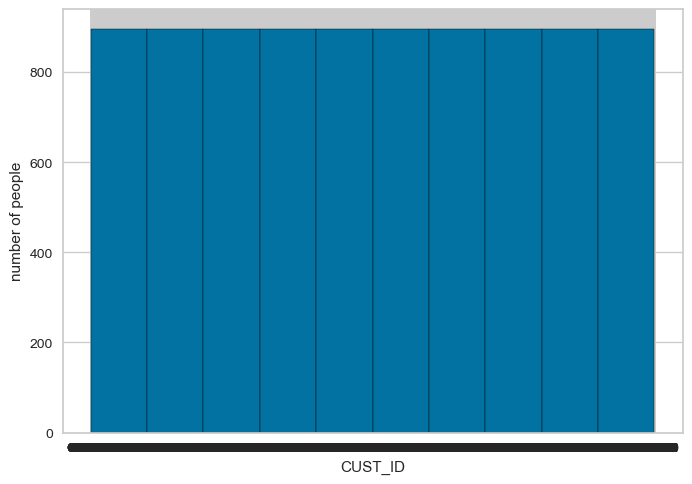

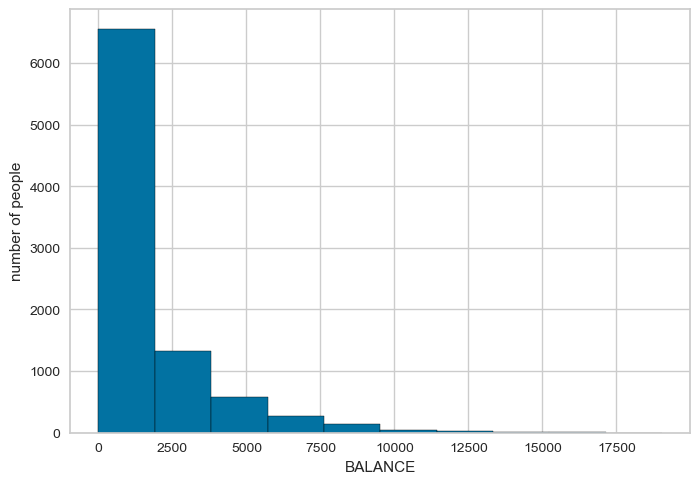

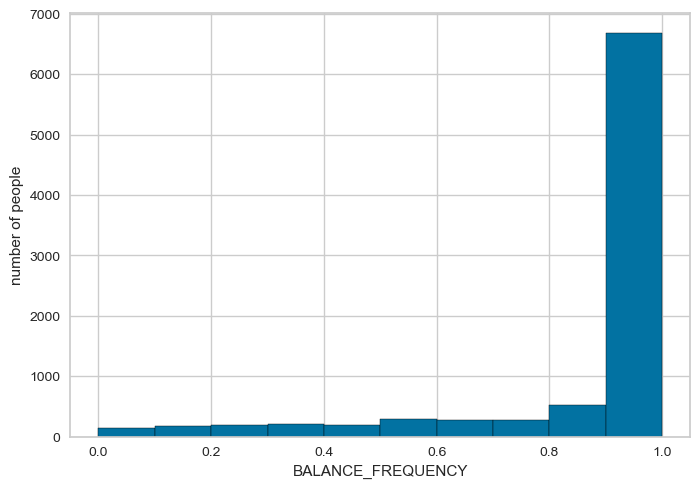

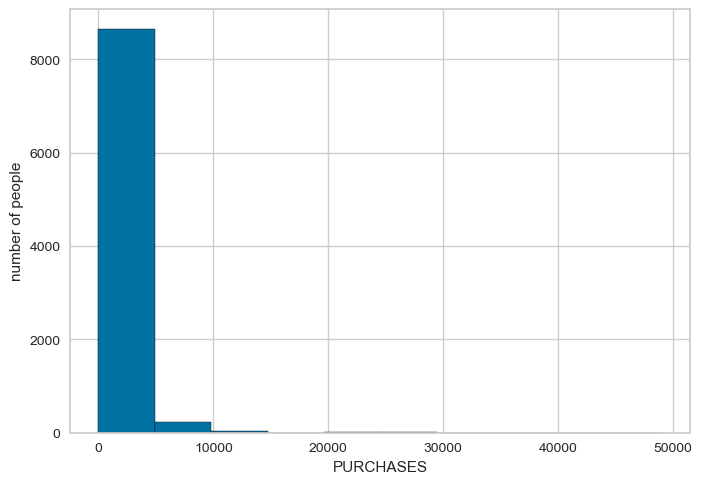

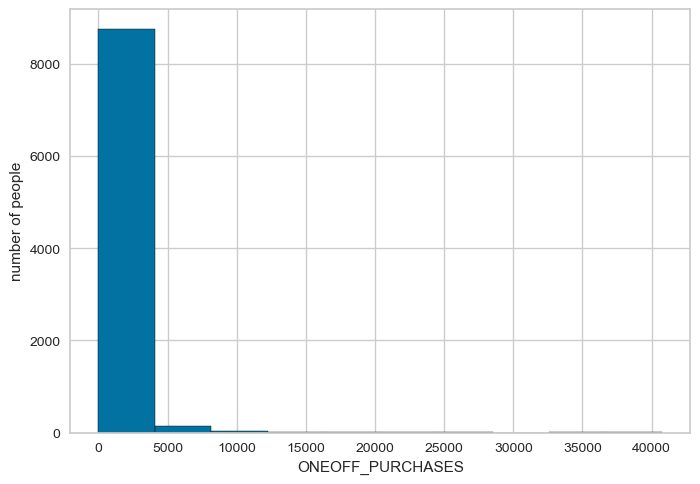

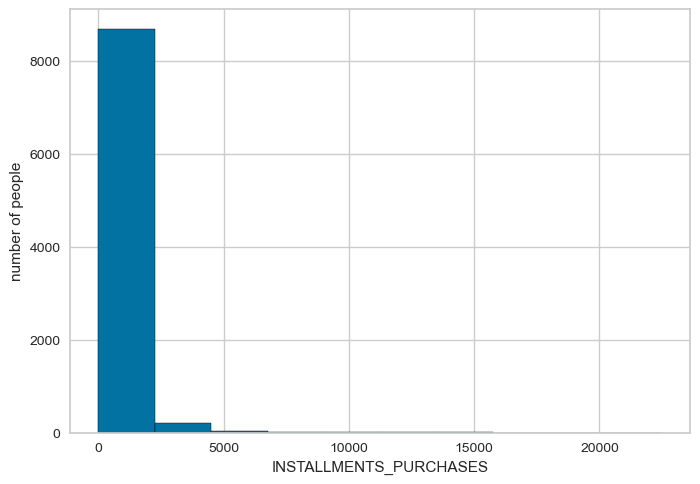

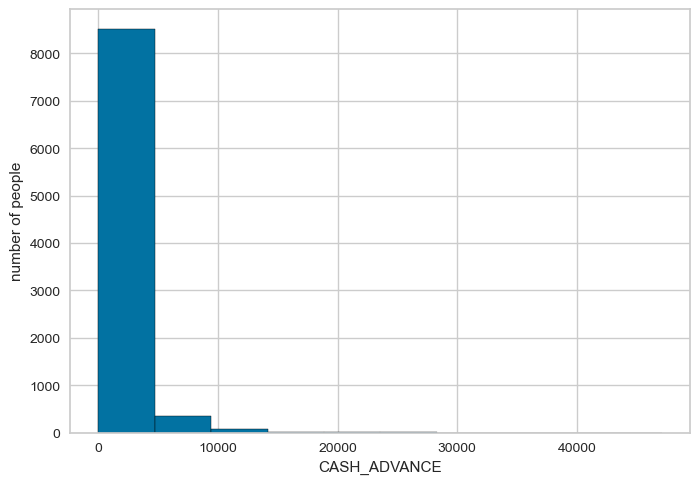

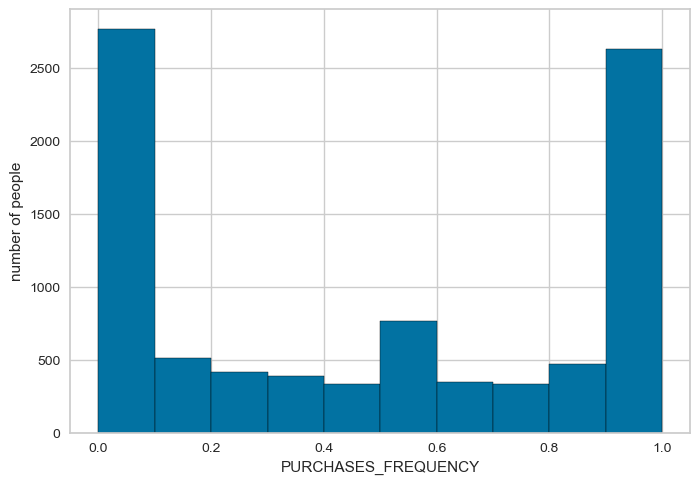

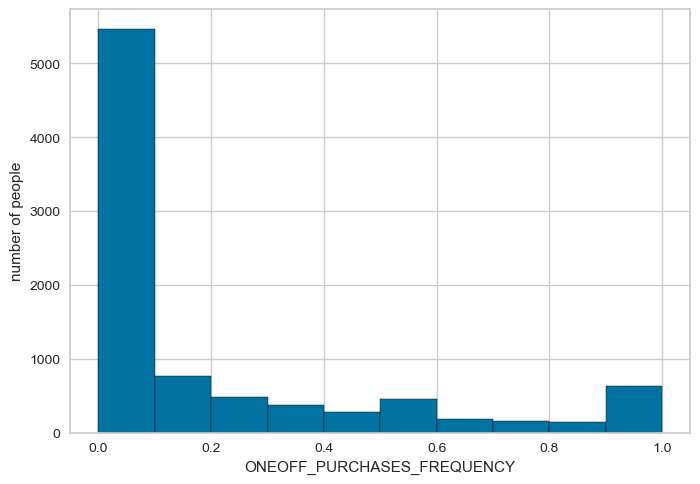

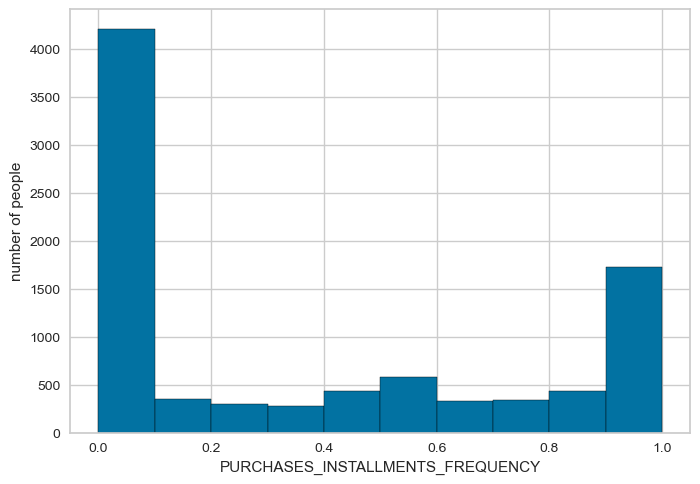

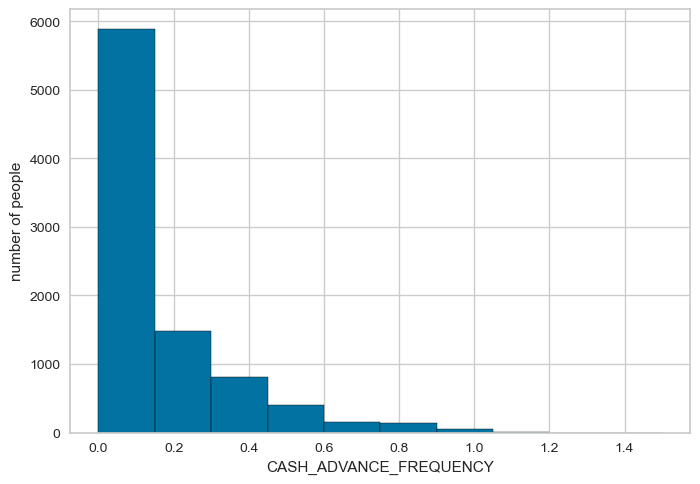

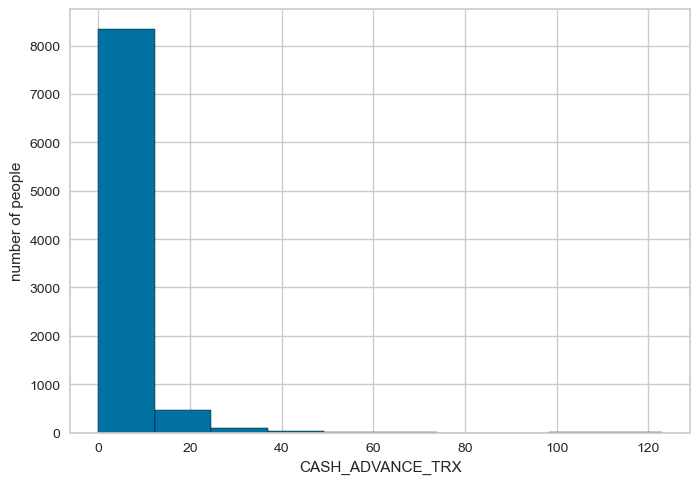

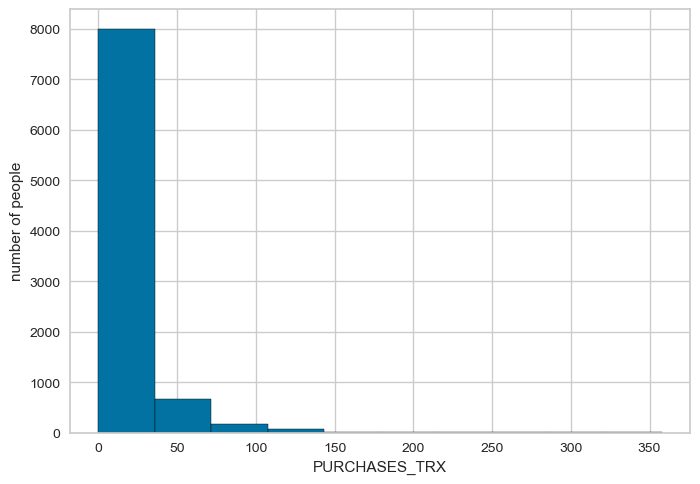

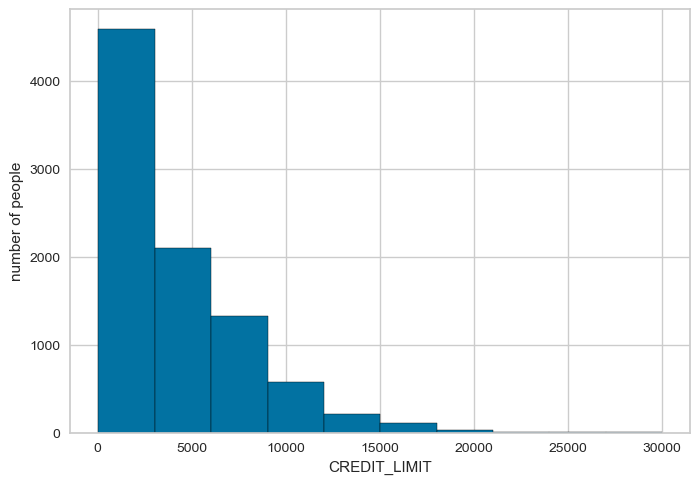

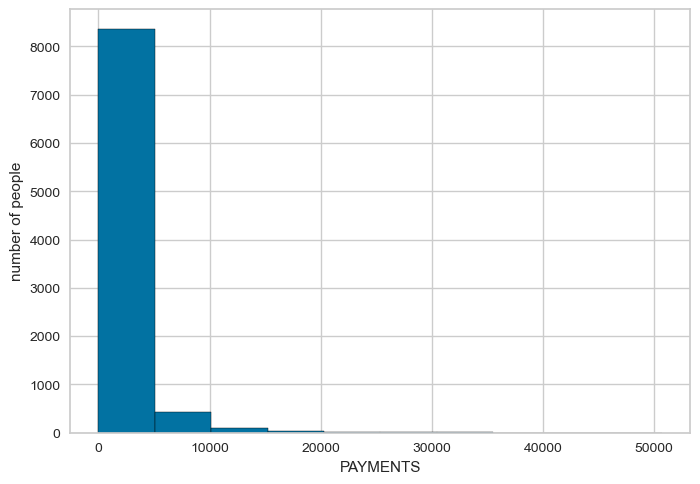

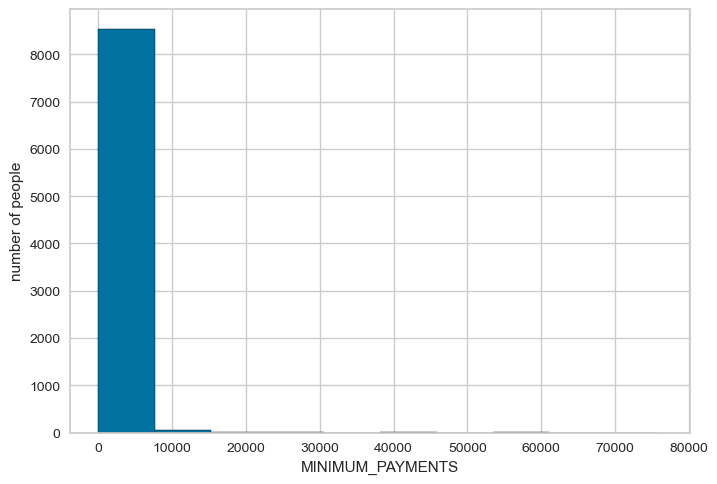

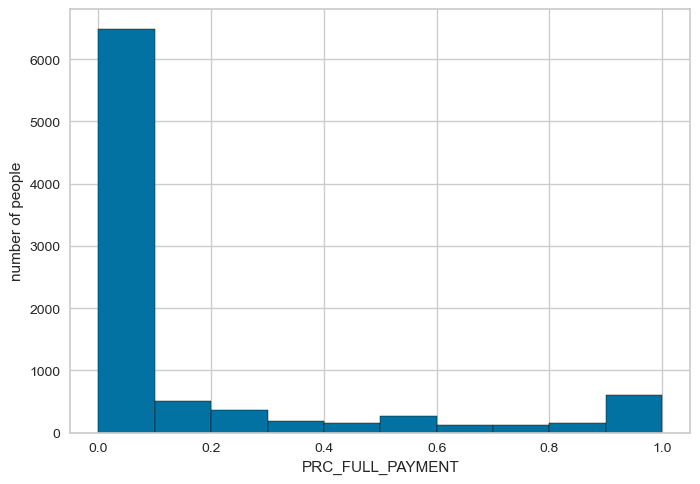

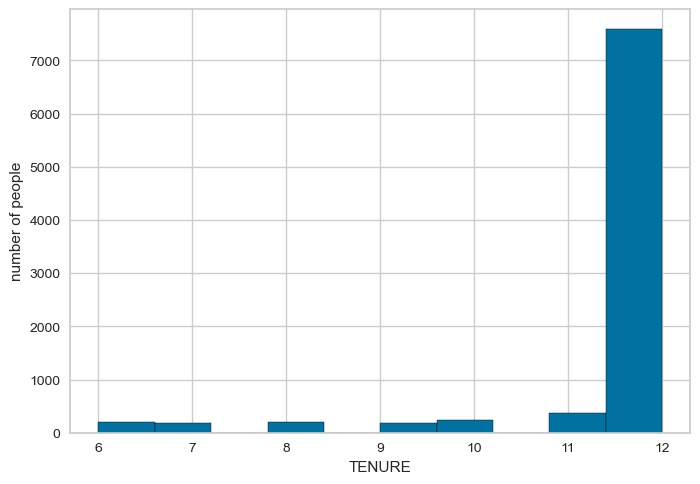

In [7]:
#histograms of all columns except cust_id
for i in df.loc[:, df.columns != 'cust_id']:
    plt.hist(df[i], edgecolor='black')
    plt.xticks()
    plt.xlabel(i)
    plt.ylabel('number of people')
    plt.show()

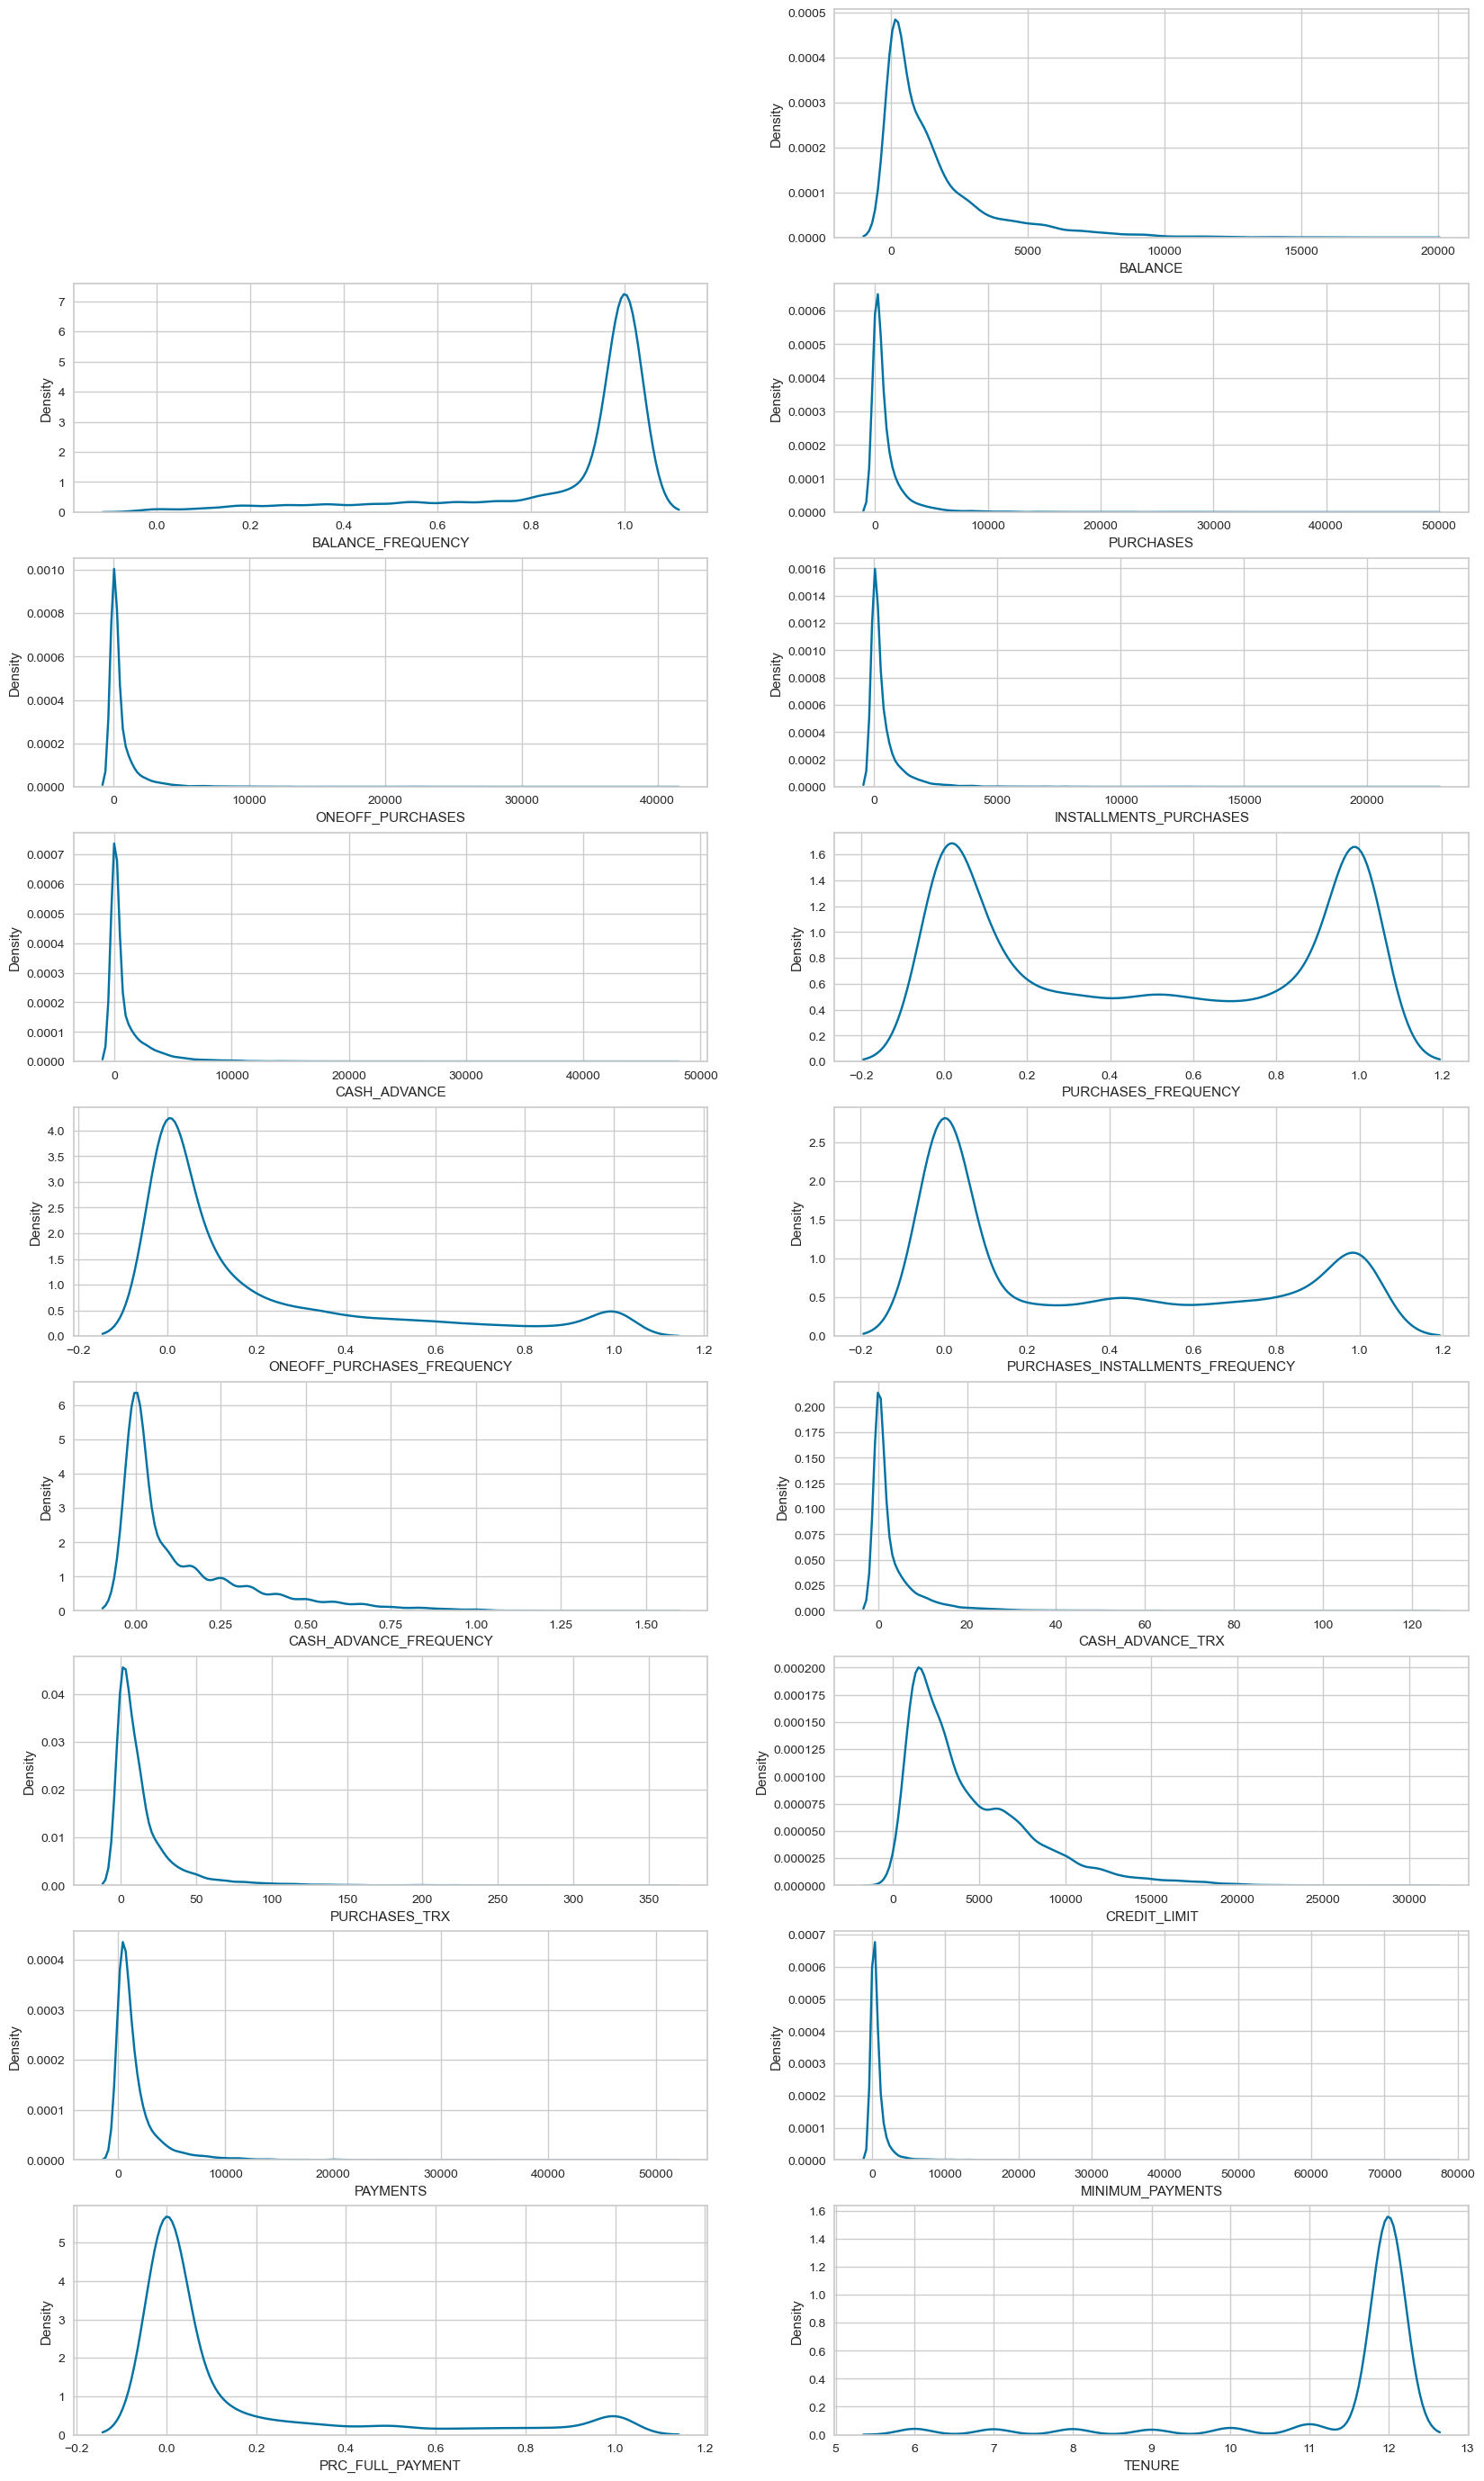

In [8]:
plt.figure(figsize=(20,35))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

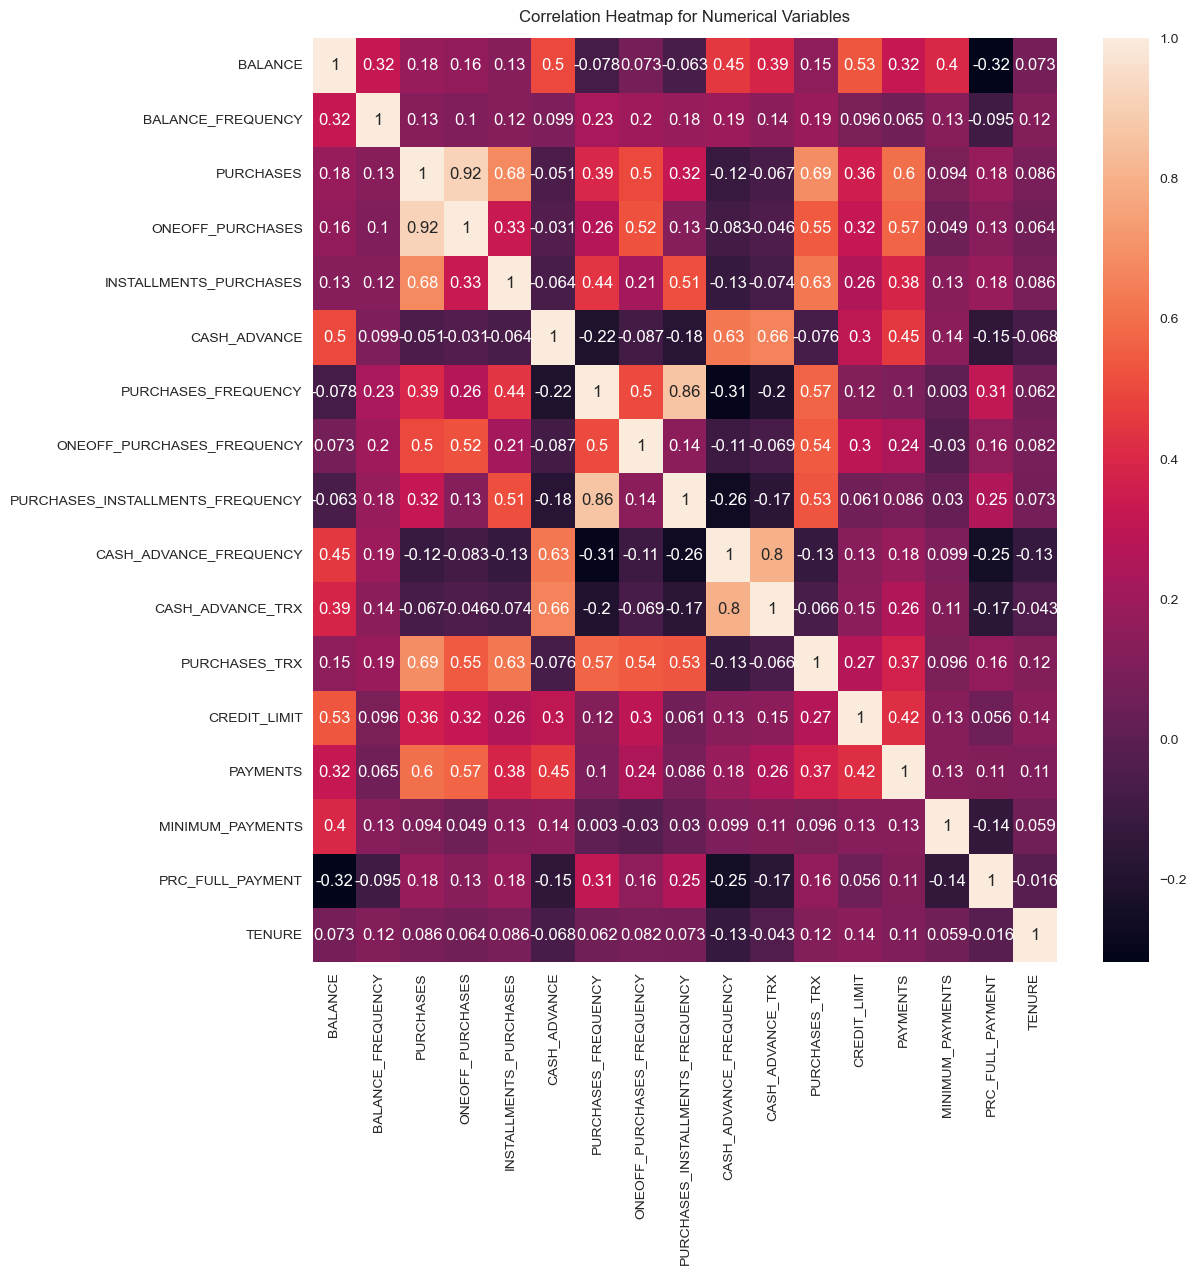

In [9]:
#heat map to find extreme positive and negative correlations

plt.figure(figsize=(12,12))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title('Correlation Heatmap for Numerical Variables', fontdict={'fontsize':12}, pad=12);
plt.show()

Dari beberapa proses yang telah dilakukan dapat diketahui :
* Pada kolom CREDIT_LIMIT terdapat 1 missing value dan pada MINIMUM_PAYMENTS terdapat 313 missing value.
* Banyak kolom memiliki jumlah nilai 0 yang besar. Selain itu, sebagian besar kolom memiliki distribusi yang condong ke kanan, seperti yang terlihat dari histogram dan perbandingan nilai rata-rata dan median (nilai rata-rata lebih kecil daripada nilai median).
* Beberapa variabel memiliki nilai korelasi sedang hingga tinggi dengan variabel lain (>0.5 hingga 1). Contohnya adalah variabel PURCHASES dan ONEOFF_PURCHASES, dengan nilai korelasi 0.92. Contoh lainnya adalah antara CASH_ADVANCE_TRX dengan CASH_ADVANCE_FREQUENCY yang memiliki nilai korelasi 0.8.
* Pengguna kartu kredit cenderung memilih tenor 12 bulan dibanding opsi tenor lainnya saat menggunakan kartu kredit. Ini bisa diambil kesimpulan bahwa pelanggan cenderung lebih cenderung untuk melunasi kredit dalam jangka panjang dengan konsekuensi tingginya tingkat bunga.
* Sebagian besar akun kartu kredit memiliki skor 1 pada kolom FREKUENSI_BALANCE, yang menunjukkan bahwa sebagian besar pelanggan menggunakan kartu kredit secara teratur. Namun, hal ini berbeda dengan ONEOFF_PURCHASES dan PURCHASES_INSTALLMENT_FREQUENCY, di mana mayoritas pelanggan tidak menggunakan kartu kredit untuk transaksi sekali bayar atau pembayaran dalam angsuran.

# EDA

#### credit limit vs balanced based on tenure

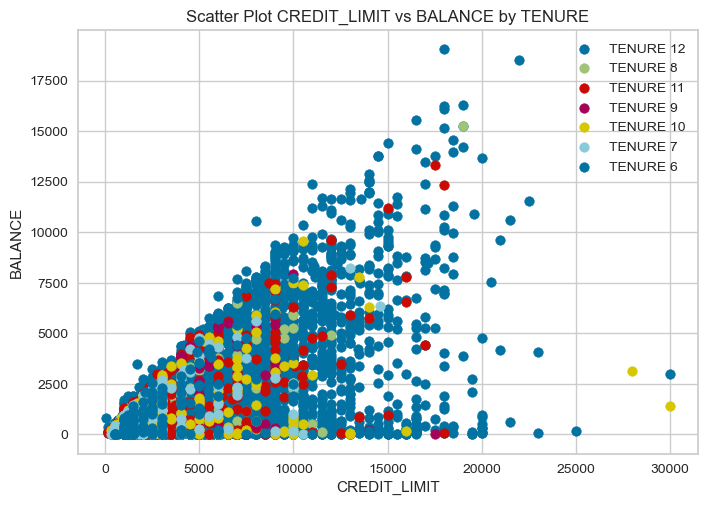

In [10]:
tenures = df['TENURE'].unique()
for tenure in tenures:
    subset = df[df['TENURE'] == tenure]
    plt.scatter(subset['CREDIT_LIMIT'], subset['BALANCE'], label=f'TENURE {tenure}')

plt.xlabel('CREDIT_LIMIT')
plt.ylabel('BALANCE')
plt.legend()
plt.title('Scatter Plot CREDIT_LIMIT vs BALANCE by TENURE')
plt.show()

Dari hasil diatas dapat dilihat bahwa sebagian besar pelanggan kartu kredit lebih memilih jangka waktu 12 bulan.

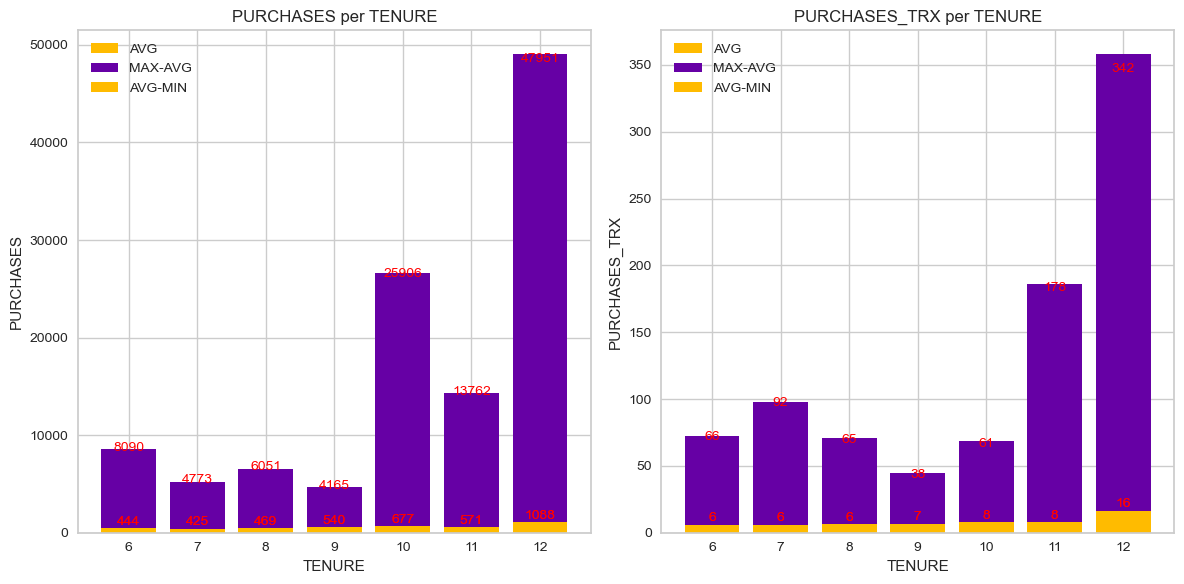

In [11]:

eda2_1 = df[['PURCHASES', 'TENURE']]
eda2_1 = eda2_1.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

eda2_2 = df[['PURCHASES_TRX', 'TENURE']]
eda2_2 = eda2_2.groupby('TENURE').agg(MIN=('PURCHASES_TRX', 'min'), AVG=('PURCHASES_TRX', 'mean'), MAX=('PURCHASES_TRX', 'max')).reset_index()

# Add values
plt.figure(figsize=(12, 6))

# Bar plot PURCHASES per TENURE
plt.subplot(1, 2, 1)
bars1 = plt.bar(eda2_1['TENURE'], eda2_1['AVG'], color='#FFBB00', label='AVG')
bars2 = plt.bar(eda2_1['TENURE'], eda2_1['MAX'] - eda2_1['AVG'], bottom=eda2_1['AVG'], color='#6600A5', label='MAX-AVG')
bars3 = plt.bar(eda2_1['TENURE'], eda2_1['AVG'] - eda2_1['MIN'], bottom=eda2_1['MIN'], color='#FFBB00', label='AVG-MIN')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES')
plt.title('PURCHASES per TENURE')
plt.legend()

# Add values PURCHASES above each bar
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 20, round(yval), ha='center', va='bottom', fontsize=10, color='red')

# Add values PURCHASES_TRX per TENURE
plt.subplot(1, 2, 2)
bars4 = plt.bar(eda2_2['TENURE'], eda2_2['AVG'], color='#FFBB00', label='AVG')
bars5 = plt.bar(eda2_2['TENURE'], eda2_2['MAX'] - eda2_2['AVG'], bottom=eda2_2['AVG'], color='#6600A5', label='MAX-AVG')
bars6 = plt.bar(eda2_2['TENURE'], eda2_2['AVG'] - eda2_2['MIN'], bottom=eda2_2['MIN'], color='#FFBB00', label='AVG-MIN')
plt.xlabel('TENURE')
plt.ylabel('PURCHASES_TRX')
plt.title('PURCHASES_TRX per TENURE')
plt.legend()

#Add values PURCHASES_TRX above each bar
for bars in [bars4, bars5, bars6]:
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, round(yval), ha='center', va='bottom', fontsize=10, color='red')

plt.tight_layout()
plt.show()

Dapat disimpulkan bahwa pelanggan kartu kredit dengan tenur selama 12 bulan cenderung melakukan pembelian dengan jumlah yang lebih besar dan memiliki lebih banyak transaksi pembelian total dibandingkan dengan pelanggan dengan tenur lainnya.

Grafik di atas juga menunjukkan bahwa pelanggan dengan tenur sepuluh bulan memiliki jumlah pembelian yang lebih tinggi daripada pelanggan dengan tenur sebelas bulan. Namun, hal ini berbanding terbalik dengan total transaksi, di mana pelanggan dengan tenur sepuluh bulan memiliki jumlah transaksi yang lebih sedikit daripada pelanggan dengan tenur sebelas bulan. 

# Preprocessing

In [12]:
# Dropping `CUST_ID` Column
df = df.drop(['CUST_ID'], axis=1)

In [13]:
#Imputation
null_columns = df.columns[df.isnull().any()].tolist()

imputer = KNNImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df[null_columns]), columns=null_columns)
df = df.fillna(df_imp)

In [14]:
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,1215.951453,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
# Scalling
X = pd.DataFrame(StandardScaler().fit_transform(df))

In [16]:
# Transform into Array
X = np.asarray(X)

# Applying PCA
pca = PCA(n_components=2, random_state=24)
X = pca.fit_transform(X)

# Clustering Model

## K-Means 

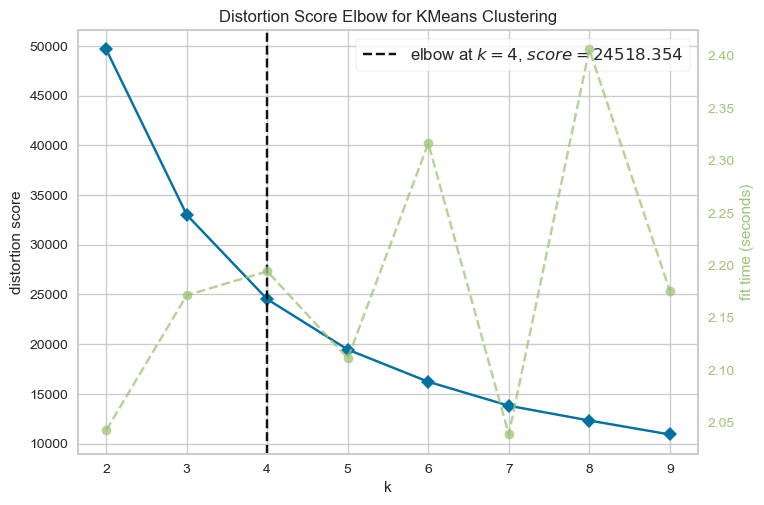

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [17]:
#Elbow Method
model = KMeans(random_state=42, n_init=10)
distortion_visualizer = KElbowVisualizer(model, k=(2,10))

distortion_visualizer.fit(X)       
distortion_visualizer.show()       

Berdasarkan hasil dari elbow method diatas dapat diketahui bahwa jumlah klaster terbaik untuk alghoritma K-Means adalah 4 klaster.

In [18]:
# Implementing K-Means
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init=10)
y_kmeans = kmeans.fit_predict(X)

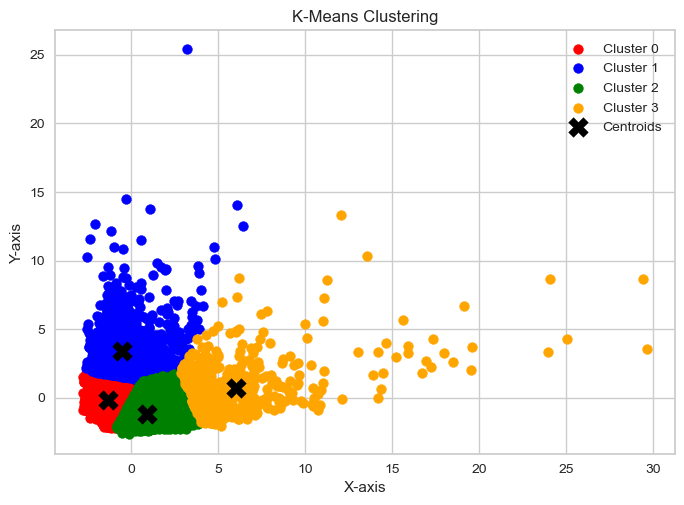

In [19]:
# cluster labels obtained from K-Means

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Cluster 0')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 1')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Cluster 2')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=50, c='orange', label='Cluster 3')

# Plotting the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')

plt.title('K-Means Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [20]:
# cluster labels obtained from K-Means

unique, counts = np.unique(y_kmeans, return_counts=True)
cluster_counts = dict(zip(unique, counts))

total_points = len(y_kmeans)

for cluster, count in cluster_counts.items():
    percentage = (count / total_points) * 100
    print(f"Cluster {cluster}: {percentage:.2f}%")

Cluster 0: 43.78%
Cluster 1: 13.91%
Cluster 2: 36.69%
Cluster 3: 5.62%


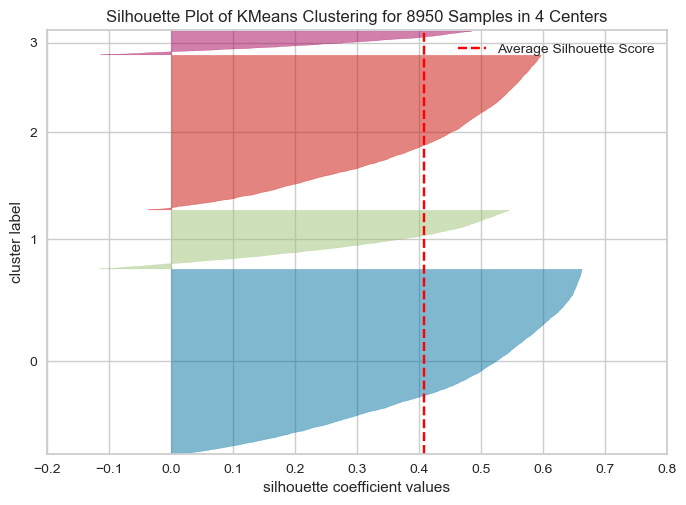

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 8950 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [21]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.show()

Dari hasil silhouette plot diatas dapat dilihat :
* nilai siluet setiap klaster berada di atas rata-rata, menunjukkan bahwa semua klaster optimal. Selain itu, dari fluktuasi ukuran plot siluet, semua klaster memiliki fluktuasi yang serupa. Namun, dari ketebalannya, klaster 0 dan 2 memiliki konsistensi yang lebih tebal dibandingkan klaster lainnya.
* dibandingkan dengan klaster lainnya, klaster 0 dan 2 memiliki viskositas yang lebih tinggi. Hal ini karena sebagian besar titik data terletak di sudut kiri bawah dari scatter plot, dan jumlah pelanggan dalam kedua klaster tersebut lebih dari 35%.

In [22]:
# Evaluate Clustering Quality Function
def evaluate_clustering(X, y):
    db_index = round(davies_bouldin_score(X, y), 3)
    s_score = round(silhouette_score(X, y), 3)
    ch_index = round(calinski_harabasz_score(X, y), 3)
    print('Evaluate Clustering Quality')
    print('Davies-Bouldin Index:', db_index)
    print('Silhouette Score:', s_score)
    print('Calinski Harabasz Index:', ch_index)
    return db_index, s_score, ch_index

# Evaluate K-Means Cluster Quality
db_kmeans, ss_kmeans, ch_kmeans = evaluate_clustering(X, y_kmeans)

Evaluate Clustering Quality
Davies-Bouldin Index: 0.801
Silhouette Score: 0.408
Calinski Harabasz Index: 5823.676


Berdasarkan nilai evaluasi yang didapat dapat disimpulkan :
* Nilai Davies-Bouldin Index sebesar 0.801 dapat dianggap sebagai hasil yang baik, menunjukkan adanya pemisahan yang baik antar klaster, namun masih memungkinkan adanya sedikit tumpang tindih.
* Nilai Silhouette Score sebesar 0.408 menunjukkan bahwa pengelompokan memiliki pemisahan yang cukup baik, namun masih ada sebagian data yang mungkin terletak cukup dekat dengan batas antar klaster.
* Nilai Calinski Harabasz Index sebesar 5823.676 menunjukkan bahwa klaster-klasternya memiliki kompakitas yang tinggi dan terpisah dengan jelas.

## DBSCAN

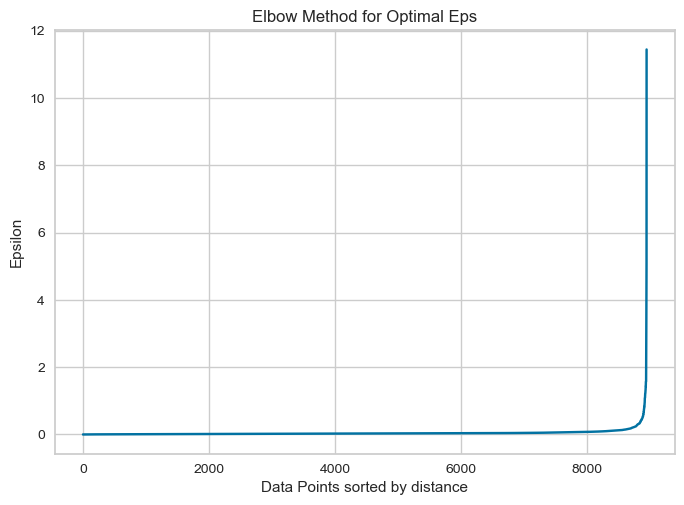

In [23]:
# Calculate the distance from each point to its nearest neighbor
nearest_neighbors = NearestNeighbors(n_neighbors=2)
neighbors = nearest_neighbors.fit(X)
distances, _ = neighbors.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Data Points sorted by distance')
plt.ylabel('Epsilon')
plt.title('Elbow Method for Optimal Eps')
plt.show()

Dari plot diatas dapat dilihat, kelengkungan maksimum kurva berada sekitar angka 2.

In [24]:
# Implementing DBSCAN
dbscan = DBSCAN(eps=2, min_samples=4)
y_dbscan = dbscan.fit_predict(X)

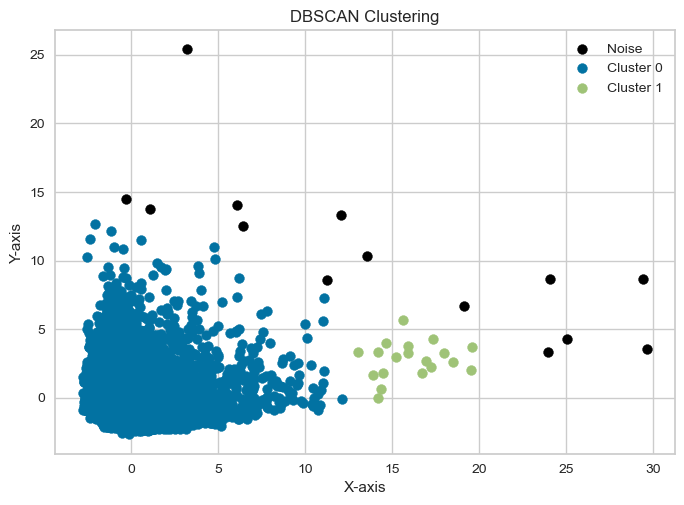

In [25]:
unique_labels = np.unique(y_dbscan)

for label in unique_labels:
    if label == -1:
        plt.scatter(X[y_dbscan == label][:, 0], X[y_dbscan == label][:, 1], color='black', s=50, label='Noise')
    else:
        plt.scatter(X[y_dbscan == label][:, 0], X[y_dbscan == label][:, 1], s=50, label=f'Cluster {label}')

plt.title('DBSCAN Clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [26]:
# Evaluate DBSCAN Cluster Quality
db_dbscan, ss_dbscan, ch_dbscan = evaluate_clustering(X, y_dbscan)

Evaluate Clustering Quality
Davies-Bouldin Index: 1.287
Silhouette Score: 0.803
Calinski Harabasz Index: 685.303


Berdasarkan nilai evaluasi yang didapat dapat disimpulkan :
* Nilai Davies-Bouldin Index sebesar 1.287 dapat dianggap sebagai hasil yang baik, menunjukkan adanya pemisahan yang baik antar klaster, namun masih memungkinkan adanya sedikit tumpang tindih.
* Nilai Silhouette Score sebesar 0.803 menunjukkan bahwa pengelompokan memiliki pemisahan yang cukup baik, namun masih ada sebagian data yang mungkin terletak cukup dekat dengan batas antar klaster.
* Nilai Calinski Harabasz Index sebesar 685.303 menunjukkan bahwa klaster-klasternya memiliki kompakitas yang tinggi dan terpisah dengan jelas.

# Model Comparison

In [27]:
# Creating a DataFrame to display the results
data = {
    'Clustering Method': ['K-Means', 'DBSCAN'],
    'Davies-Bouldin Index': [db_kmeans, db_dbscan],
    'Silhouette Score': [ss_kmeans, ss_dbscan],
    'Calinski-Harabasz Index': [ch_kmeans, ch_dbscan]
}

compare = pd.DataFrame(data)
print(compare)

  Clustering Method  Davies-Bouldin Index  Silhouette Score  \
0           K-Means                 0.801             0.408   
1            DBSCAN                 1.287             0.803   

   Calinski-Harabasz Index  
0                 5823.676  
1                  685.303  


Dari hasil diatas dapat disimpulkan :
* K-Means memiliki nilai Davies-Bouldin Index yang lebih rendah (0.801), yang menunjukkan bahwa klaster yang dihasilkan cenderung lebih baik dalam hal kompak dan terpisah secara jelas.
* DBSCAN memiliki nilai Silhouette Score yang lebih tinggi (0.803), yang menandakan bahwa klaster dari DBSCAN memiliki batasan yang lebih baik.
* K-Means memiliki nilai Calinski-Harabasz Index yang jauh lebih tinggi (5823.676) dibandingkan dengan DBSCAN (685.303). Nilai ini menunjukkan bahwa klaster yang dihasilkan oleh K-Means memiliki varian yang lebih besar antara klaster dan lebih terpisah secara jelas.
* Selain itu, K-Means memiliki jumlah klaster berjumlah 4 klaster. Sedangkan DBSCAN hanya memiliki 2 klaster.

Maka dapat dikatakan K-Means memiliki kualitas clustering yang baik dibandingkan DBSCAN. 

# Cluster Customer Based on the K-Means Model

In [28]:
# Add K-Means Prediction to Data Frame
df['cluster_result'] = y_kmeans
df['cluster_result'] = 'Cluster '+df['cluster_result'].astype(str)

# Calculationg Overall Mean from Current Data Frame 
df_profile_overall = pd.DataFrame()
df_profile_overall['Overall'] = df.describe().loc[['mean']].T

In [29]:
df_cluster_summary = df.groupby('cluster_result').describe().T.reset_index().rename(columns={'level_0': 'Column Name', 'level_1': 'Metrics'})
df_cluster_summary = df_cluster_summary[df_cluster_summary['Metrics'] == 'mean'].set_index('Column Name')

In [30]:
df_profile = df_cluster_summary.join(df_profile_overall).reset_index()

In [31]:
df_profile

,Column Name,Metrics,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Overall
0,BALANCE,mean,1012.915503,4510.612798,824.180354,3401.840056,1564.474828
1,BALANCE_FREQUENCY,mean,0.799792,0.963486,0.919997,0.988427,0.877271
2,PURCHASES,mean,223.081279,462.647357,1236.499406,6894.613917,1003.204834
3,ONEOFF_PURCHASES,mean,157.576608,300.127390,621.738764,4511.889901,592.437371
4,INSTALLMENTS_PURCHASES,mean,65.833785,162.619301,614.965725,2383.916859,411.067645
5,CASH_ADVANCE,mean,614.588758,4401.478579,147.442197,773.154467,978.871112
6,PURCHASES_FREQUENCY,mean,0.190099,0.266258,0.862440,0.954443,0.490351
7,ONEOFF_PURCHASES_FREQUENCY,mean,0.074901,0.129829,0.301883,0.726667,0.202458
8,PURCHASES_INSTALLMENTS_FREQUENCY,mean,0.109962,0.166187,0.675116,0.808946,0.364437
9,CASH_ADVANCE_FREQUENCY,mean,0.122459,0.470904,0.030698,0.084806,0.135144


# Conclusion

Terdapat dua algoritma yang digunakan untuk membuat klaster, yaitu algoritma K-Means dan DBSCAN. Sebelum membuat model dengan kedua algoritma tersebut. Dilakukan beberapa tahapan prepocessing yaitu : 
1. Dropping variables yang tidak diperlukan 
2. Imputing values untuk data null dengan menggunakan KNNImputer, KNNImputer digunakan karena memungkinkan imputasi yang lebih akurat untuk nilai-nilai yang hilang dalam dataset.
3. Scalling, menggunakan standar scaler untuk menghasilkan pengelompokan yang berkualitas tinggi, dan meningkatkan akurasi algoritma pengelompokan.

Dari kedua model yang digunakan, didapatkan hasil model dengan menggunakan K-Means lebih baik dibandingkan dengan DBSCAN.

Dengan menggunakan algoritma K-Means didapatkan karakteristik dari tiap klaster sebagai berikut :
* Klaster 0 cenderung terdiri dari pengguna kartu kredit yang memiliki saldo rata-rata rendah, melakukan pembelian dalam jumlah kecil dengan frekuensi rendah, serta tidak terlalu sering melakukan penarikan uang tunai (cash advance). Mereka umumnya memiliki limit kredit yang relatif rendah dan cenderung tidak melakukan pembayaran penuh secara rutin.
* Klaster 1 terdiri dari pengguna kartu kredit dengan saldo rata-rata tertinggi, sering melakukan pembelian baik dalam jumlah besar maupun kecil, juga cenderung melakukan penarikan uang tunai (cash advance) dalam jumlah yang signifikan. Mereka memiliki limit kredit yang tinggi namun cenderung lebih jarang melakukan pembayaran penuh.
* Klaster 2 terdiri dari pengguna kartu kredit yang memiliki saldo rata-rata rendah namun aktif dalam melakukan pembelian dalam jumlah besar dengan frekuensi tinggi. Mereka jarang melakukan penarikan uang tunai (cash advance), memiliki limit kredit yang sedang, dan cenderung lebih sering melakukan pembayaran penuh.
* Klaster 3 terdiri dari pengguna kartu kredit dengan saldo rata-rata di tengah-tengah, namun sangat aktif dalam melakukan pembelian baik dari segi jumlah maupun frekuensi. Mereka jarang melakukan penarikan uang tunai (cash advance), memiliki limit kredit yang tinggi, dan cenderung lebih sering melakukan pembayaran penuh.

# Model Deployment

In [32]:
from joblib import dump

# Train K-Means model
kmeans = KMeans(n_clusters=4, random_state=32, max_iter=500, n_init=10)
kmeans.fit(X)

# Save the model to a file
dump(kmeans, 'kmeans_model.joblib')


['kmeans_model.joblib']

In [ ]:
!pip install gunicorn

from flask import Flask, jsonify, request
from joblib import load

app = Flask(__name__)

# Load the saved K-Means model
kmeans = load('kmeans_model.joblib')

@app.route('/predict', methods=['POST'])
def predict():
    # Retrieve data from request
    data = request.get_json()
    # Perform prediction using the loaded K-Means model
    predictions = kmeans.predict(data)
    # Convert predictions to JSON format
    return jsonify({'predictions': predictions.tolist()})

if __name__ == '__main__':
    app.run(debug=False, use_reloader=False)


In [ ]:
Flask==2.0.1
scikit-learn==0.24.2